In [2]:
# Constants
TRAIN_FRACTION = 0.8
RANDOM_SEED = 86720

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
train_data = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [8]:
train_index = list(train_data.index)

In [9]:
test_data = df.drop(train_index)

In [10]:
test_index = list(test_data.index)

In [11]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [12]:
x_test = test_data[features]

In [13]:
y_test = test_data['Outcome']

In [14]:
x_train = train_data[features]
y_train = train_data['Outcome']

In [15]:
print(f"Number of diabetic patients in training - {sum(y_train)}")
print(f"Number of non-diabetic patients in training - {sum(1-(y_train))}")

Number of diabetic patients in training - 226
Number of non-diabetic patients in training - 388


In [16]:
print(f"Number of diabetic patients in test - {sum(y_test)}")
print(f"Number of non-diabetic patients in test - {sum(1-(y_test))}")

Number of diabetic patients in test - 42
Number of non-diabetic patients in test - 112


In [17]:
x_test.shape

(154, 8)

In [18]:
max_depth_tree = 1

#### Entropy Metric - Best Split

In [19]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\nentropy = 0.949\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'entropy = 0.705\nsamples = 355\nvalue = [287, 68]'),
 Text(0.75, 0.25, 'entropy = 0.965\nsamples = 259\nvalue = [101, 158]')]

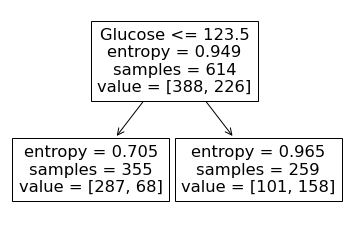

In [20]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 72.47557003257329
Recall Score: 69.91150442477876
Precision score: 61.003861003861005


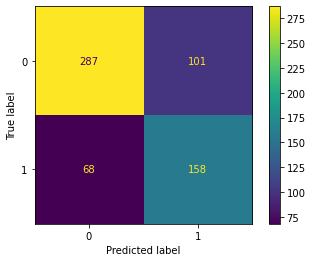

In [21]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 70.77922077922078
Recall Score: 71.42857142857143
Precision score: 47.61904761904761


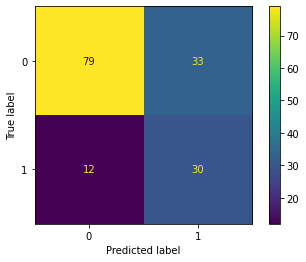

In [22]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

In [23]:
records=[]
for depth in range(1,20):
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)

    Accuracy= 100*metrics.accuracy_score(y_test,y_pred)
    Recall=100*metrics.recall_score(y_test,y_pred)
    Precision= 100*metrics.precision_score(y_test,y_pred)
    FPR = 100*(1-metrics.recall_score(y_test,y_pred,pos_label=0))
    records.append([depth,Accuracy,Recall,Precision,FPR])
df=pd.DataFrame.from_records(records,columns=['Depth','Accuracy','Recall','Precision','FPR'])

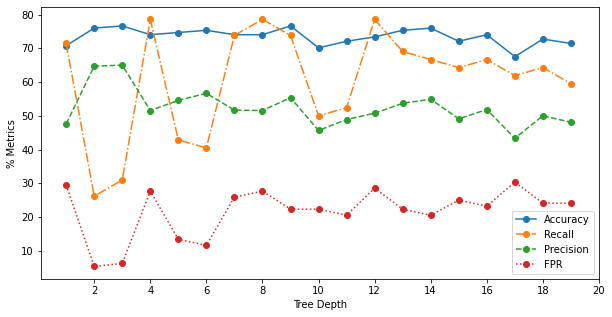

In [24]:
plt.figure(figsize=[10,5])
plt.plot(df['Depth'],df['Accuracy'],'-o')
plt.plot(df['Depth'],df['Recall'],'-.o')
plt.plot(df['Depth'],df['Precision'],'--o')
plt.plot(df['Depth'],df['FPR'],':o')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.xlabel('Tree Depth')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision','FPR'])
plt.show()
plt.close()

#### Gini Metric - Best Split

In [25]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 127.5\ngini = 0.465\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'gini = 0.329\nsamples = 385\nvalue = [305, 80]'),
 Text(0.75, 0.25, 'gini = 0.462\nsamples = 229\nvalue = [83, 146]')]

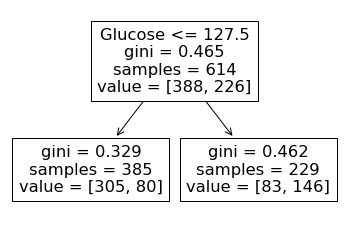

In [26]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 73.45276872964169
Recall Score: 64.60176991150442
Precision score: 63.75545851528385


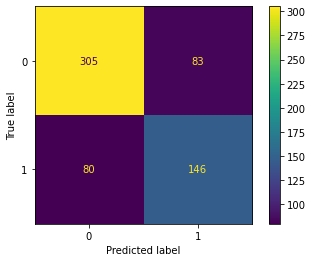

In [27]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 74.02597402597402
Recall Score: 66.66666666666666
Precision score: 51.85185185185185


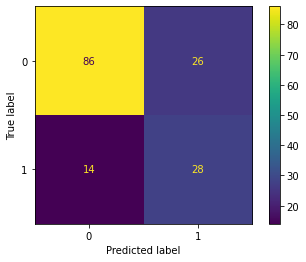

In [28]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Entropy Metric - Random Split

In [29]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Glucose <= 96.192\nentropy = 0.949\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'entropy = 0.43\nsamples = 125\nvalue = [114, 11]'),
 Text(0.75, 0.25, 'entropy = 0.989\nsamples = 489\nvalue = [274, 215]')]

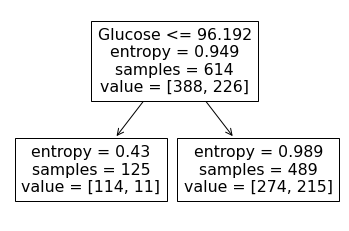

In [30]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 63.19218241042345
Recall Score: 0.0
Precision score: 0.0


c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


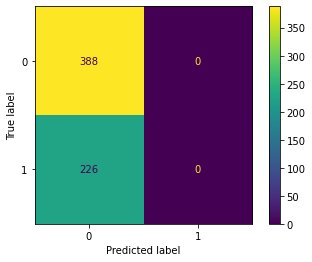

In [31]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 72.72727272727273
Recall Score: 0.0
Precision score: 0.0


c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


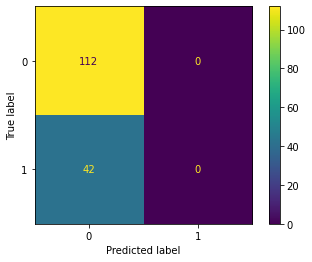

In [32]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Gini Metric - Random Split

In [33]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Insulin <= 127.846\ngini = 0.465\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'gini = 0.433\nsamples = 455\nvalue = [311, 144]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 159\nvalue = [77, 82]')]

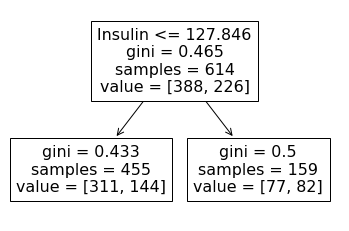

In [34]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 64.00651465798045
Recall Score: 36.283185840707965
Precision score: 51.57232704402516


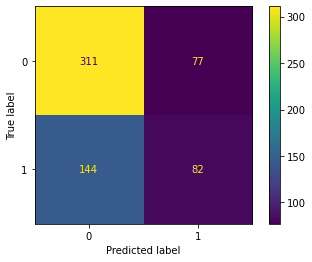

In [35]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 70.77922077922078
Recall Score: 35.714285714285715
Precision score: 45.45454545454545


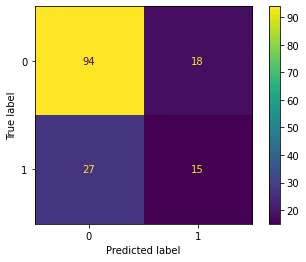

In [36]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

In [37]:
cv1 = train_data.sample(frac=0.2,random_state=1234)

In [38]:
train_data.shape

(614, 9)

In [39]:
cv1.shape

(123, 9)

In [40]:
restcv1 = train_data.drop(list(cv1.index))

In [41]:
restcv1.shape

(491, 9)

In [42]:
cv2 = restcv1.sample(frac=0.25,random_state=1122)
restcv2 = restcv1.drop(list(cv2.index))

In [43]:
restcv2.shape

(368, 9)

In [44]:
cv3 = restcv2.sample(frac=0.334,random_state=122)
restcv3 = restcv2.drop(list(cv3.index))


In [45]:
restcv3.shape

(245, 9)

In [46]:
cv4 = restcv3.sample(frac=0.502,random_state=22)
restcv4 = restcv3.drop(list(cv4.index))


In [47]:
cv5 = restcv4

In [48]:
print(cv1.shape)
print(cv2.shape)
print(cv3.shape)
print(cv4.shape)
print(cv5.shape)

(123, 9)
(123, 9)
(123, 9)
(123, 9)
(122, 9)


In [49]:
# first crossval leave cv5 for test 
first_crossval = cv1.append(cv2.append(cv3.append(cv4)))
# second crossval leave cv4 for test 
second_crossval = cv1.append(cv2.append(cv3.append(cv5)))
# third crossval leave cv3 for test 
third_crossval = cv1.append(cv2.append(cv4.append(cv5)))
# fourth crossval leave cv2 for test 
fourth_crossval = cv1.append(cv3.append(cv4.append(cv5)))
# fifth crossval leave cv1 for test 
fifth_crossval = cv2.append(cv3.append(cv4.append(cv5)))

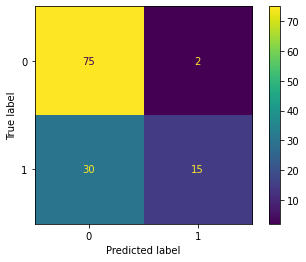

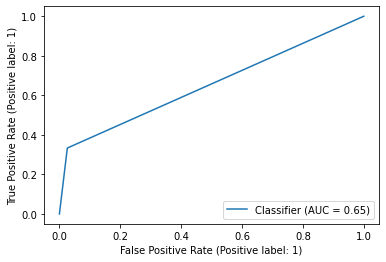

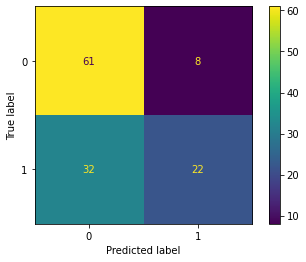

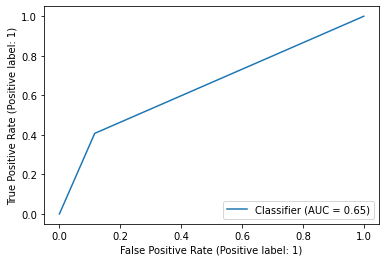

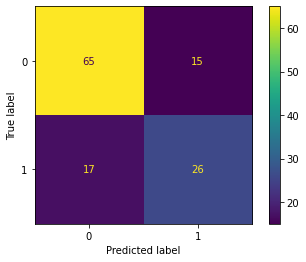

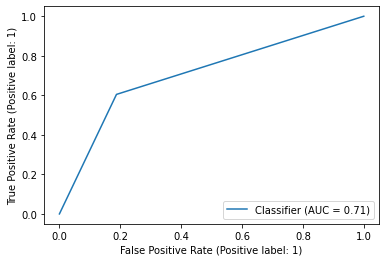

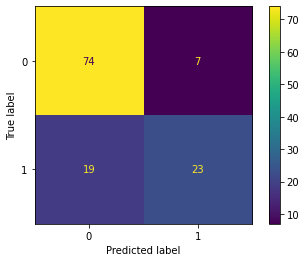

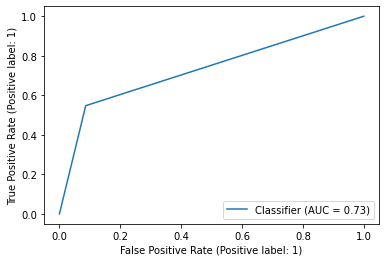

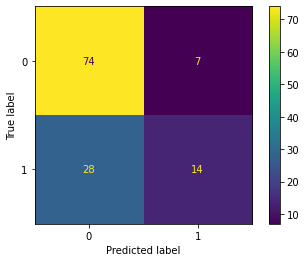

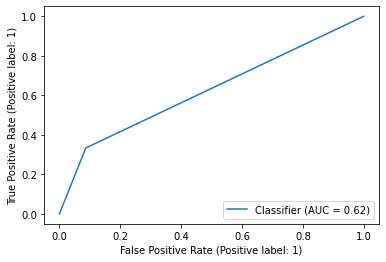

In [50]:
# Depth 2 
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=2,splitter="best")
    dtree.fit(x_tra,y_tra)
    y_pred = dtree.predict(x_te)
    metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
    metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
    cv_accuracy.append(100*metrics.accuracy_score(y_te,y_pred))
    cv_recall.append(100*metrics.recall_score(y_te,y_pred))
    cv_precision.append(100*metrics.precision_score(y_te,y_pred))
    

In [53]:
print(cv_accuracy)
print(cv_recall)
print(cv_precision)

[73.77049180327869, 67.47967479674797, 73.98373983739837, 78.86178861788618, 71.54471544715447]
[33.33333333333333, 40.74074074074074, 60.46511627906976, 54.761904761904766, 33.33333333333333]
[88.23529411764706, 73.33333333333333, 63.41463414634146, 76.66666666666667, 66.66666666666666]


In [54]:
print(f"Depth 2 - Avg. Accuracy: {np.mean(cv_accuracy)}")
print(f"Depth 2 - Avg. Recall: {np.mean(cv_recall)}")
print(f"Depth 2 - Avg. Precision: {np.mean(cv_precision)}")
print(f"Depth 2 - Std. Accuracy: {np.std(cv_accuracy)}")
print(f"Depth 2 - Std. Recall: {np.std(cv_recall)}")
print(f"Depth 2 - Std. Precision: {np.std(cv_precision)}")

Depth 2 - Avg. Accuracy: 73.12808210049315
Depth 2 - Avg. Recall: 44.526885689676384
Depth 2 - Avg. Precision: 73.66331898613103
Depth 2 - Std. Accuracy: 3.699507692773752
Depth 2 - Std. Recall: 11.168786254667879
Depth 2 - Std. Precision: 8.6655655519943


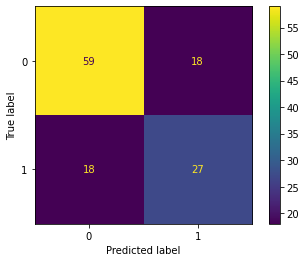

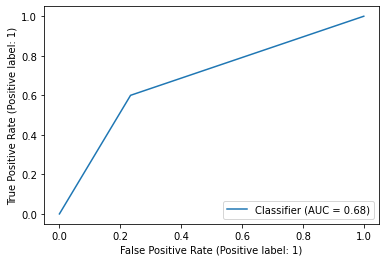

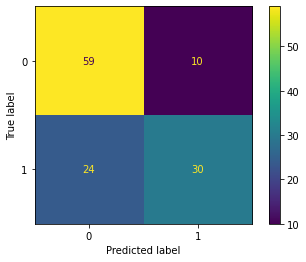

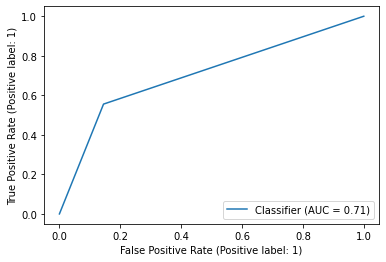

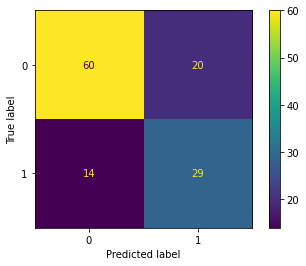

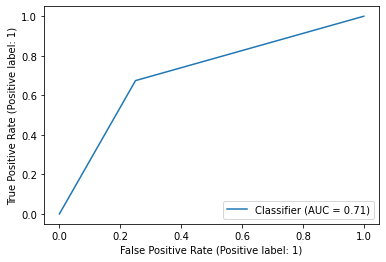

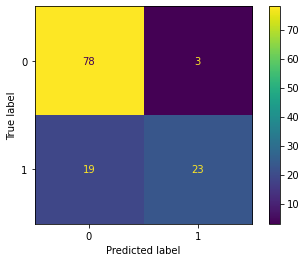

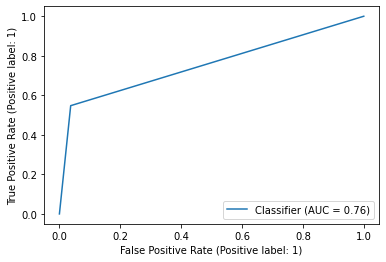

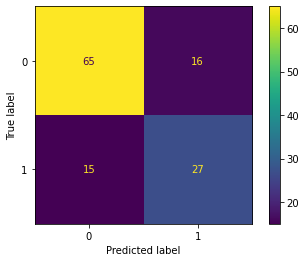

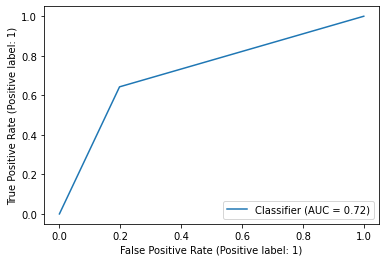

In [55]:
# depth 5
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=5,splitter="best")
    dtree.fit(x_tra,y_tra)
    y_pred = dtree.predict(x_te)
    metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
    metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
    cv_accuracy.append(100*metrics.accuracy_score(y_te,y_pred))
    cv_recall.append(100*metrics.recall_score(y_te,y_pred))
    cv_precision.append(100*metrics.precision_score(y_te,y_pred))
    

In [56]:
print(f"Depth 5 - Avg. Accuracy: {np.mean(cv_accuracy)}")
print(f"Depth 5 - Avg. Recall: {np.mean(cv_recall)}")
print(f"Depth 5 - Avg. Precision: {np.mean(cv_precision)}")
print(f"Depth 5 - Std. Accuracy: {np.std(cv_accuracy)}")
print(f"Depth 5 - Std. Recall: {np.std(cv_recall)}")
print(f"Depth 5 - Std. Precision: {np.std(cv_precision)}")

Depth 5 - Avg. Accuracy: 74.42356390777023
Depth 5 - Avg. Recall: 60.409007013658176
Depth 5 - Avg. Precision: 69.08718192106896
Depth 5 - Std. Accuracy: 4.081015971536892
Depth 5 - Std. Recall: 4.901080056029229
Depth 5 - Std. Precision: 11.230575922713905
